
<img src="res/viu_logo.png" width="200">

## 01MIAR - Actividad Video Valenbici
### Nombre: Mayra Pullupaxi


#### Objetivo
Se requiere aplicar el conocimiento de Pandas y Numpy dado el conjunto de datos "estaciones_bici.csv" que tiene los de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

#### Actividad


Primero se importan las librerías necesarias

In [263]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Luego se obtiene la ruta y los datos del archivo csv

In [264]:
ruta_bicis = os.path.join('res', 'estaciones_bici.csv')
bicis = pd.read_csv(ruta_bicis, sep=';')

1.- Carga de los datos en el dataframe con las columnas a usar

In [265]:
data_bicis = bicis[['station','total','download_date','available']]
display(data_bicis.head())

station  total            download_date  available
0       64     20  2019-02-10 17:25:37.787          9
1       73     20  2019-02-10 17:25:37.787          6
2       63     20  2019-02-10 18:13:39.827         20
3       64     20  2019-02-10 18:13:39.827          6
4       65     19  2019-02-10 18:13:39.827          9

2.- Se obtiene el número de estaciones que tienen un total de 30 bornetas

In [266]:
total_bornetas = data_bicis[data_bicis['total'] == 30]
print(f'Total de bornetas disponibles: {len(total_bornetas)}')

Total de bornetas disponibles: 1098


3.- Se muestra el número de estación con la media más alta de bicis disponibles

In [267]:
#Se aplica groupby sobre la estación para obtener la media de bicis disponibles y con idxmax se obtiene la media máxima
numero_estacion = data_bicis.groupby('station').mean()['available'].idxmax()
print(f'Número de estación: {numero_estacion}')

Número de estación: 50


4.- Histograma de las bicis disponibles de la estación del punto anterior

Text(0, 0.5, 'Frecuencia')

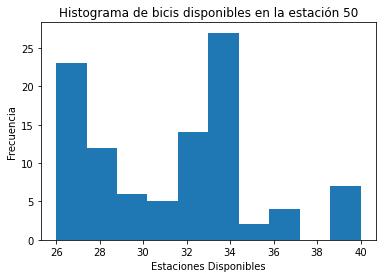

In [268]:
bicis_disponibles = data_bicis[data_bicis['station'] == numero_estacion]

#Se usa hist para el histograma, se nombra el título y se describe los ejes
bicis_disponibles['available'].plot.hist()
plt.title('Histograma de bicis disponibles en la estación 50')
plt.xlabel('Estaciones Disponibles')
plt.ylabel('Frecuencia')

5.- Gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

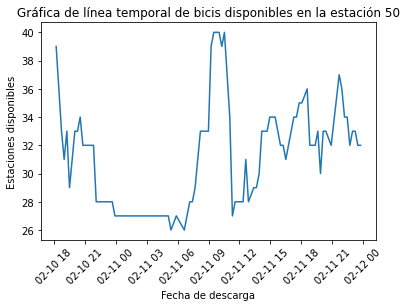

In [269]:
#Permite asignar el índica a la fecha para que sea el eje x
bicis_disponibles.set_index('download_date')
x_bicis = pd.to_datetime(bicis_disponibles['download_date'], infer_datetime_format=True)
y_bicis = bicis_disponibles['available']

#Se crea el gráfico
fig,axis = plt.subplots(1,1)
axis.plot(x_bicis, y_bicis)
axis.set_title('Gráfica de línea temporal de bicis disponibles en la estación 50')
axis.set_xlabel('Fecha de descarga')
axis.set_ylabel('Estaciones disponibles')
plt.xticks(rotation=45)
plt.show()